In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import  neighbors
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
trainday = pd.read_excel(r"G:\traindata\yddata\6-8month.xlsx")#读取展示数据
# trainday = pd.read_csv(r"G:\traindata\yddata\YDday.csv")#读取展示数据

<function matplotlib.pyplot.show(*args, **kw)>

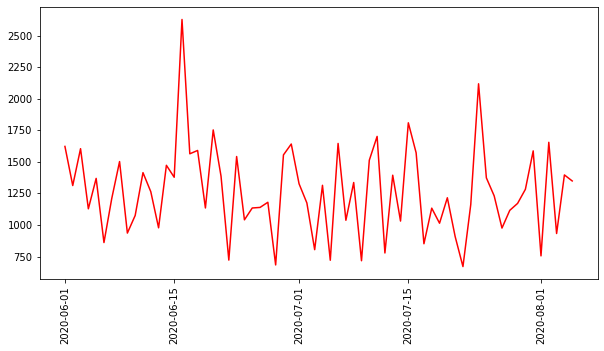

In [3]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(trainday['SALEDATE'],trainday['MONEY'],'r-')
# ax.plot(trainday['SALEDATE'],trainday['MONEY'],'bo')
plt.xticks(rotation=90)
plt.show

In [4]:
trainday  = pd.DataFrame(trainday)
X = trainday.iloc[:,trainday.columns != 'MONEY']
# X.iloc[:,0] = X.iloc[:,0].apply(pd.to_datetime).map(dt.datetime.toordinal)      #将时间转换为格林威治时间
# X = X.values.reshape(-1, 1)

In [5]:
y = trainday.iloc[:,trainday.columns == 'MONEY']
y = y.values.reshape(-1, 1)  #转为一维矩阵
# y = np.log(y)
# y

In [6]:
# scaler = StandardScaler()
# result = scaler.fit_transform(y)
# result 
# y = result
# y

In [7]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state =60)  #数据拆分
knn = neighbors.KNeighborsRegressor(5,weights = 'uniform')                        #取最近的七个点求平均
knn.fit(Xtrain,Ytrain)                                                            #训练模型
j = knn.score(Xtest,Ytest)                                                        #模型打分
j
y_hat = knn.predict(X)

In [8]:
import numpy as np
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)
    pint(np.mean(diff / true))
MAPE(y,y_hat)

0.2338476339646517

In [9]:
maxlist = []
for j in range(1,50):
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state =60)  #数据拆分
    knn1 = neighbors.KNeighborsRegressor(j,weights = 'uniform')                        #最近的两个点求平均
    knn1.fit(Xtrain,Ytrain)                                                            #训练模型
    j = knn1.score(Xtest,Ytest)   #模型打分
    y_hat=  knn1.predict(X)
    x = mean_absolute_error(y,y_hat)
    z = MAPE(y,y_hat)
    maxlist.append(z)
maxlist

[0.0937425483930014,
 0.20845036965034913,
 0.23161815830092755,
 0.2417062055426307,
 0.2338476339646517,
 0.24241650794164654,
 0.2409588513905372,
 0.2390888995662478,
 0.24690397331587624,
 0.2523084904695151,
 0.24841602831698542,
 0.25118591719460365,
 0.2515114393408086,
 0.25329633501613197,
 0.25124170601490514,
 0.24978402300834793,
 0.24901605360081686,
 0.251501722333111,
 0.24782654572280474,
 0.24797760339896632,
 0.24728390846463782,
 0.24836623085044168,
 0.24373894192214268,
 0.24535438645326318,
 0.24516708737307247,
 0.24197698912439505,
 0.24090348768421638,
 0.24070962880950864,
 0.2420074085002288,
 0.24256972309975974,
 0.24406335237146284,
 0.24261888389911235,
 0.24370771845994907,
 0.2427480112429003,
 0.24272413001957696,
 0.24313304752547182,
 0.24371471713381546,
 0.24184851626481452,
 0.24144007492094638,
 0.24134419105885177,
 0.24260470940779866,
 0.24414123653133413,
 0.24877528889772155,
 0.2488306496949821,
 0.24830276970333598,
 0.24859262710053542,


In [10]:
import numpy as np
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)
    pint(np.mean(diff / true))
MAPE(y,y_hat)

0.24733999766715292

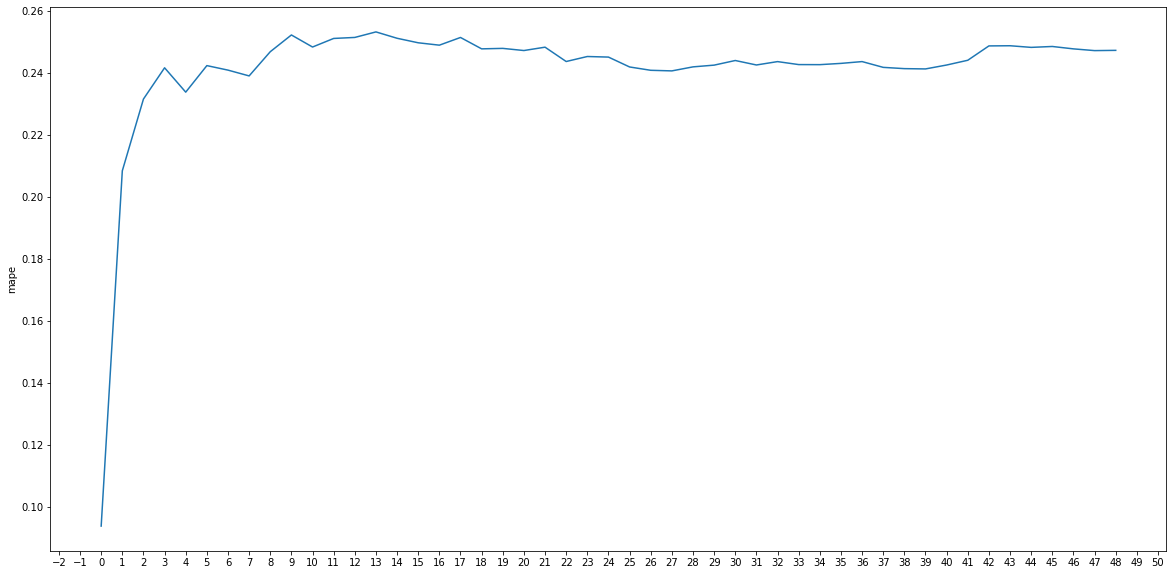

In [11]:
from matplotlib.pyplot import MultipleLocator
fig = plt.figure(figsize=(20, 10))
x_major_locator = MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator) 
plt.plot(maxlist)  # y轴变量
plt.ylabel('mape')  # y轴名字
plt.show()



# fig = plt.figure(figsize=(20, 5))
# plt.plot(range(1,50),maxlist,'b-')
# plt.show()

In [12]:
knn = neighbors.KNeighborsRegressor(5,weights = 'uniform')
knn.fit(X,y)
y_hat = knn.predict(X)
knn.score(X,y)

0.22096068271925418

<function matplotlib.pyplot.show(*args, **kw)>

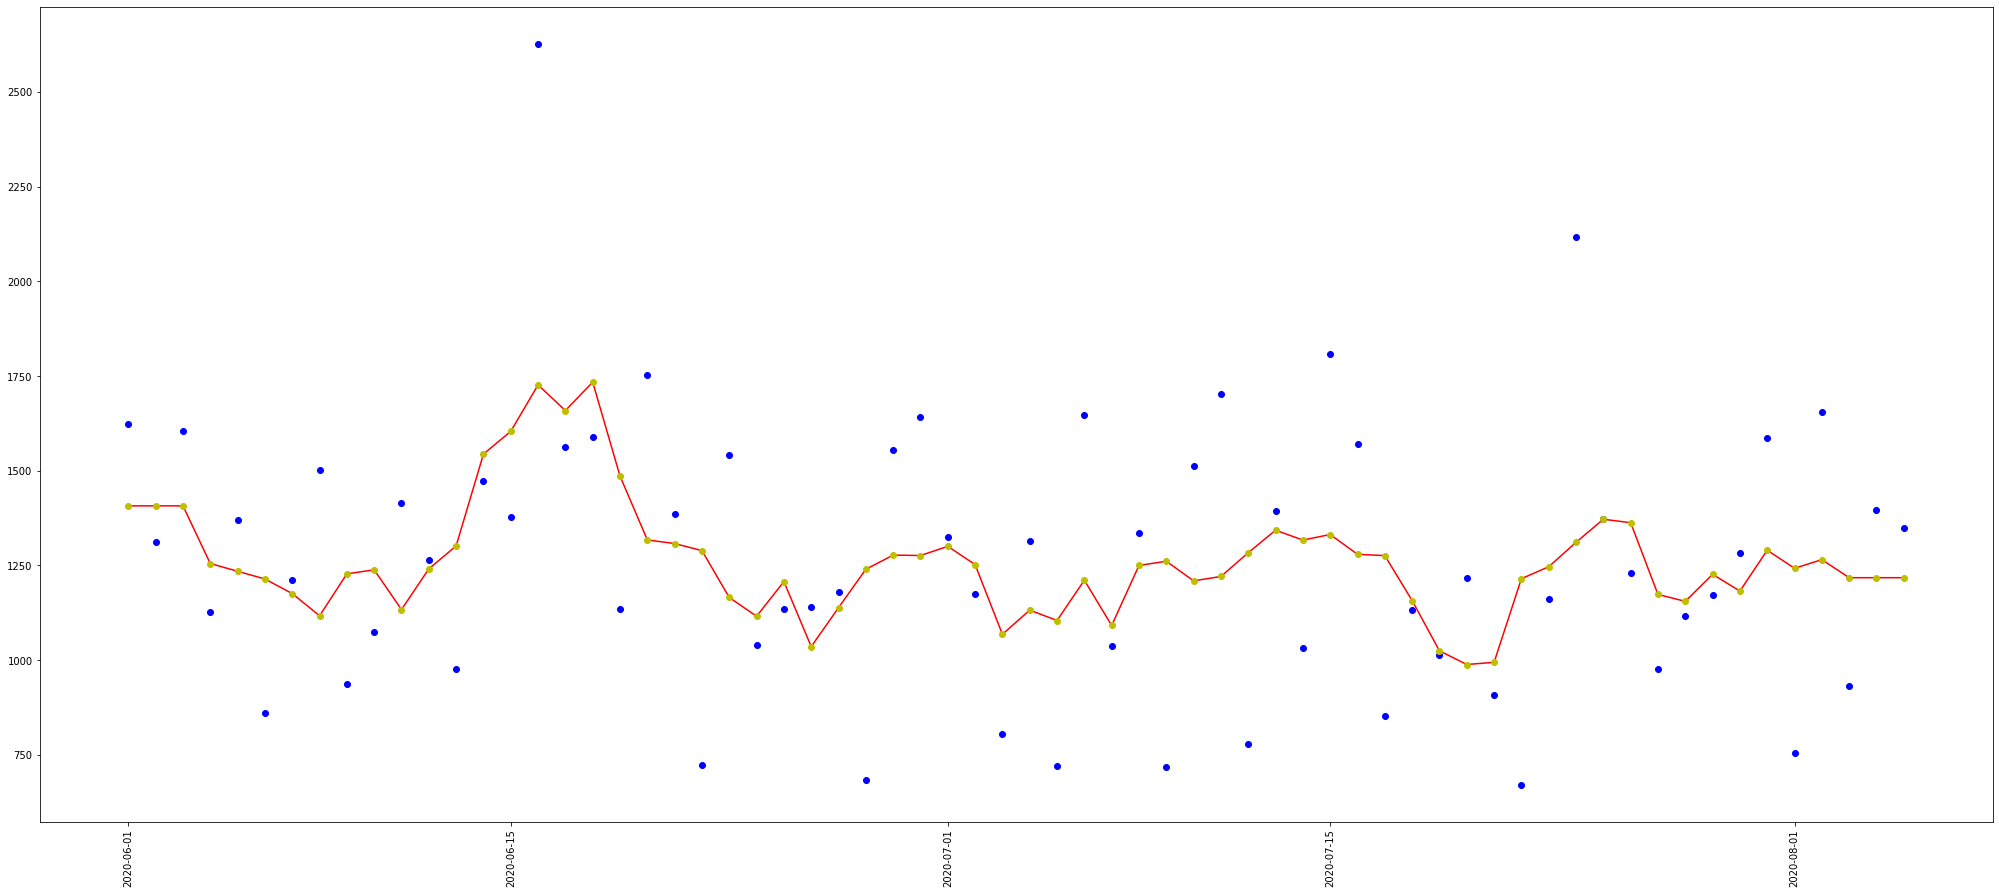

In [13]:
fig = plt.figure(figsize=(35, 15))#展示
ax = fig.add_subplot(111)
ax.plot(X.iloc[:,0],y_hat,'r-')
ax.plot(X.iloc[:,0],y,'bo')
ax.plot(X.iloc[:,0],y_hat,'yo')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

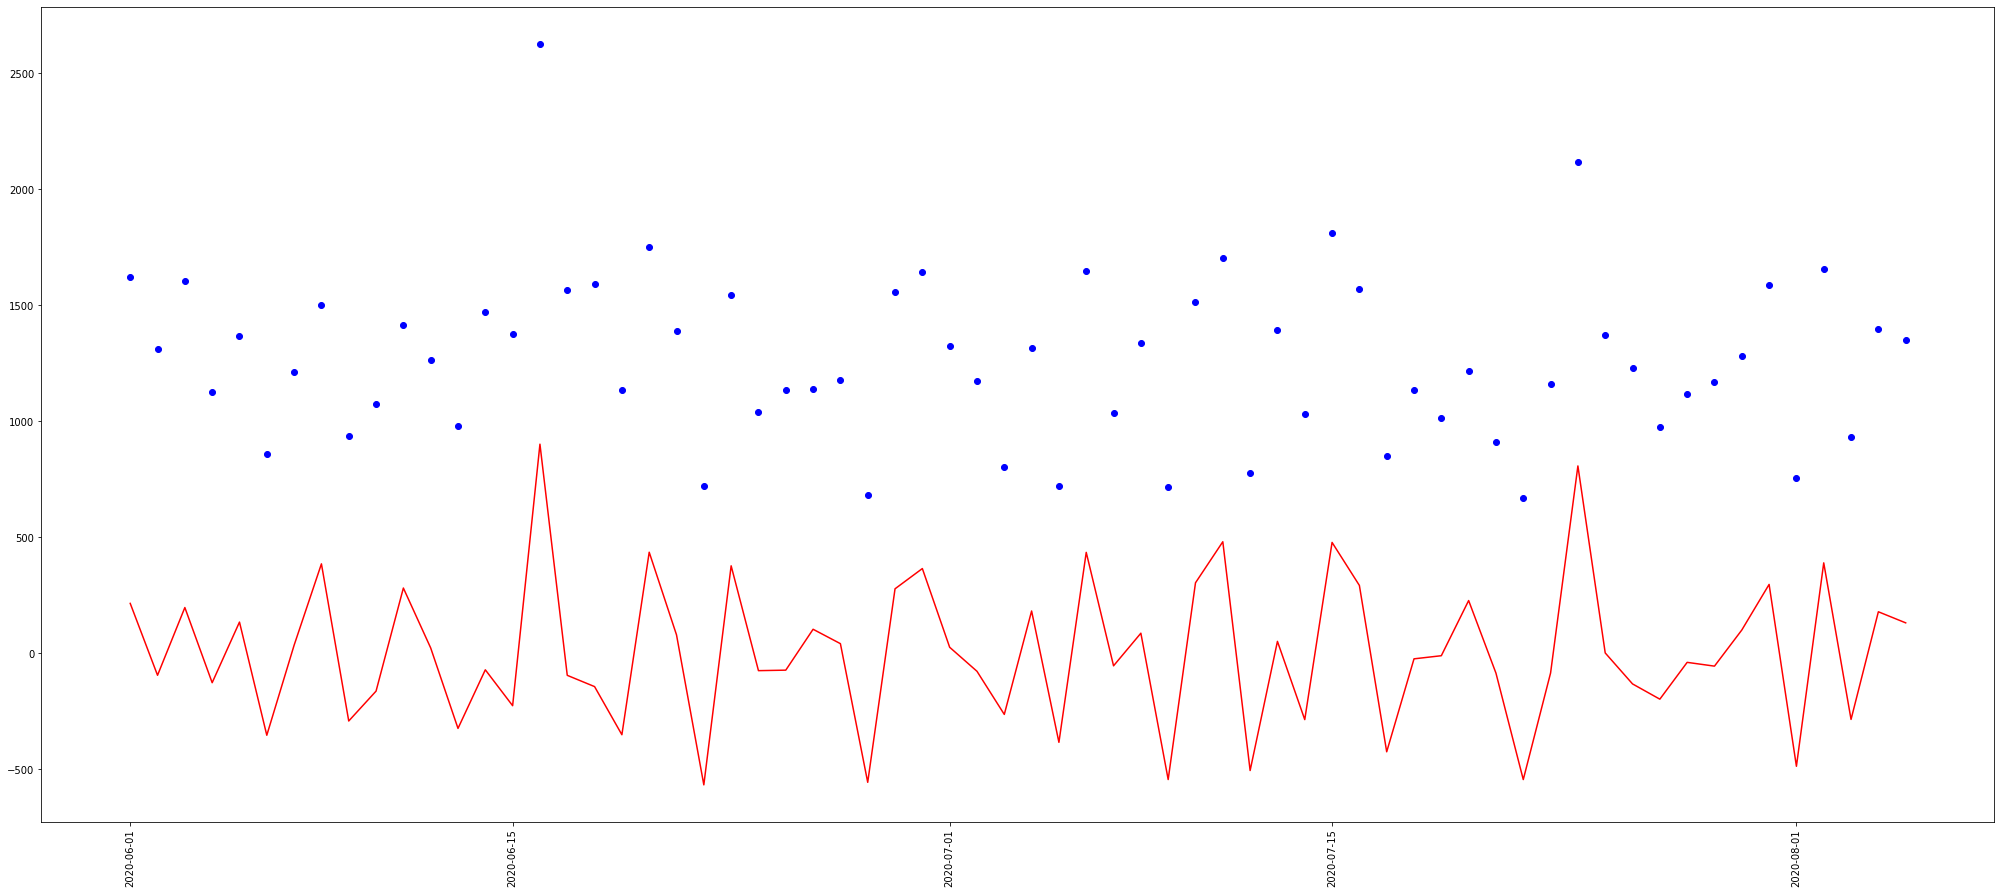

In [14]:
fig = plt.figure(figsize=(35, 15))#展示
ax = fig.add_subplot(111)
ax.plot(X.iloc[:,0],y-y_hat,'r-')
ax.plot(X.iloc[:,0],y,'bo')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

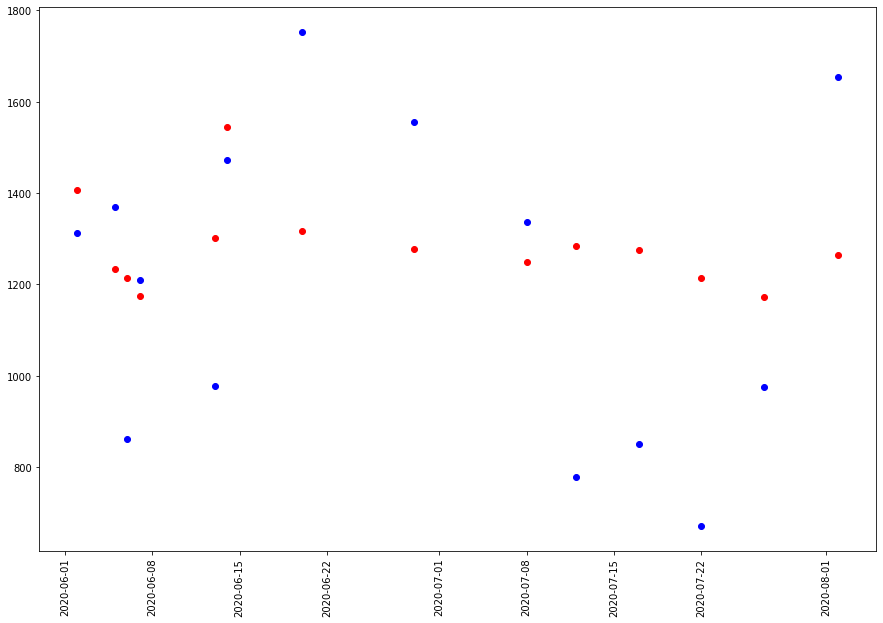

In [15]:
y_test_hat = knn.predict(Xtest)
fig = plt.figure(figsize=(15, 10))#展示
ax = fig.add_subplot(111)
ax.plot(Xtest.iloc[:,0],y_test_hat,'ro')
ax.plot(Xtest.iloc[:,0],Ytest,'bo')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

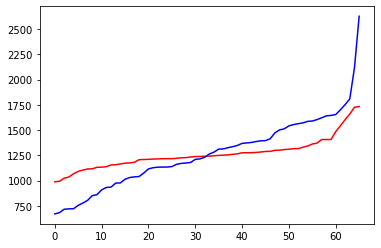

In [16]:
plt.plot(range(len(y_hat)),sorted(y_hat),'r-',label = 'polypredict')
plt.plot(range(len(y)),sorted(y),'b-',label = 'data')
plt.show

In [17]:
mean_absolute_error(y,y_hat)

247.1829909090909

In [18]:
import numpy as np
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)
    pint(np.mean(diff / true))
MAPE(y,y_hat)

0.21731616403439746

In [19]:
def mape(y_true, y_pred):
    """
    参数:
    y_true -- 测试集目标真实值
    y_pred -- 测试集目标预测值   
    返回:
    mape -- MAPE 评价指标
    """
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape
mape(y,y_hat)

array([21.7316164])

In [20]:
np.sqrt(mean_squared_error(y,y_hat))

314.41423132014586

In [21]:
mean_absolute_error(y,y_hat2)

NameError: name 'y_hat2' is not defined

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [23]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
fit1 = SimpleExpSmoothing(y).fit()  #statsmodels自动找到最优参数
pred = fit1.fittedvalues            #模型拟合值
pre = fit1.forecast(5)              #预测后面5个值，简单指数平滑中后面预测的值为最后一个拟合的值
j = mean_absolute_error(y,pred)     #平均绝对误差
j

278.09873985103036

In [24]:
import numpy as np
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)
    pint(np.mean(diff / true))
MAPE(y,pre)

0.24479041851251226

In [25]:
pre#预测值

array([1266.38891508, 1266.38891508, 1266.38891508, 1266.38891508,
       1266.38891508])

In [26]:
fit2 = Holt(y).fit()
pred2 = fit2.fittedvalues         #模型拟合值
pre2 = fit2.forecast(5)           #预测后面5个值
mean_absolute_error(y,pred2)      #平均绝对误差
# pre2                            #预测值

D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


337.5886015982601

In [27]:
import numpy as np
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)
    pint(np.mean(diff / true))
MAPE(y,pre2)

0.2590225926207512

<function matplotlib.pyplot.show(*args, **kw)>

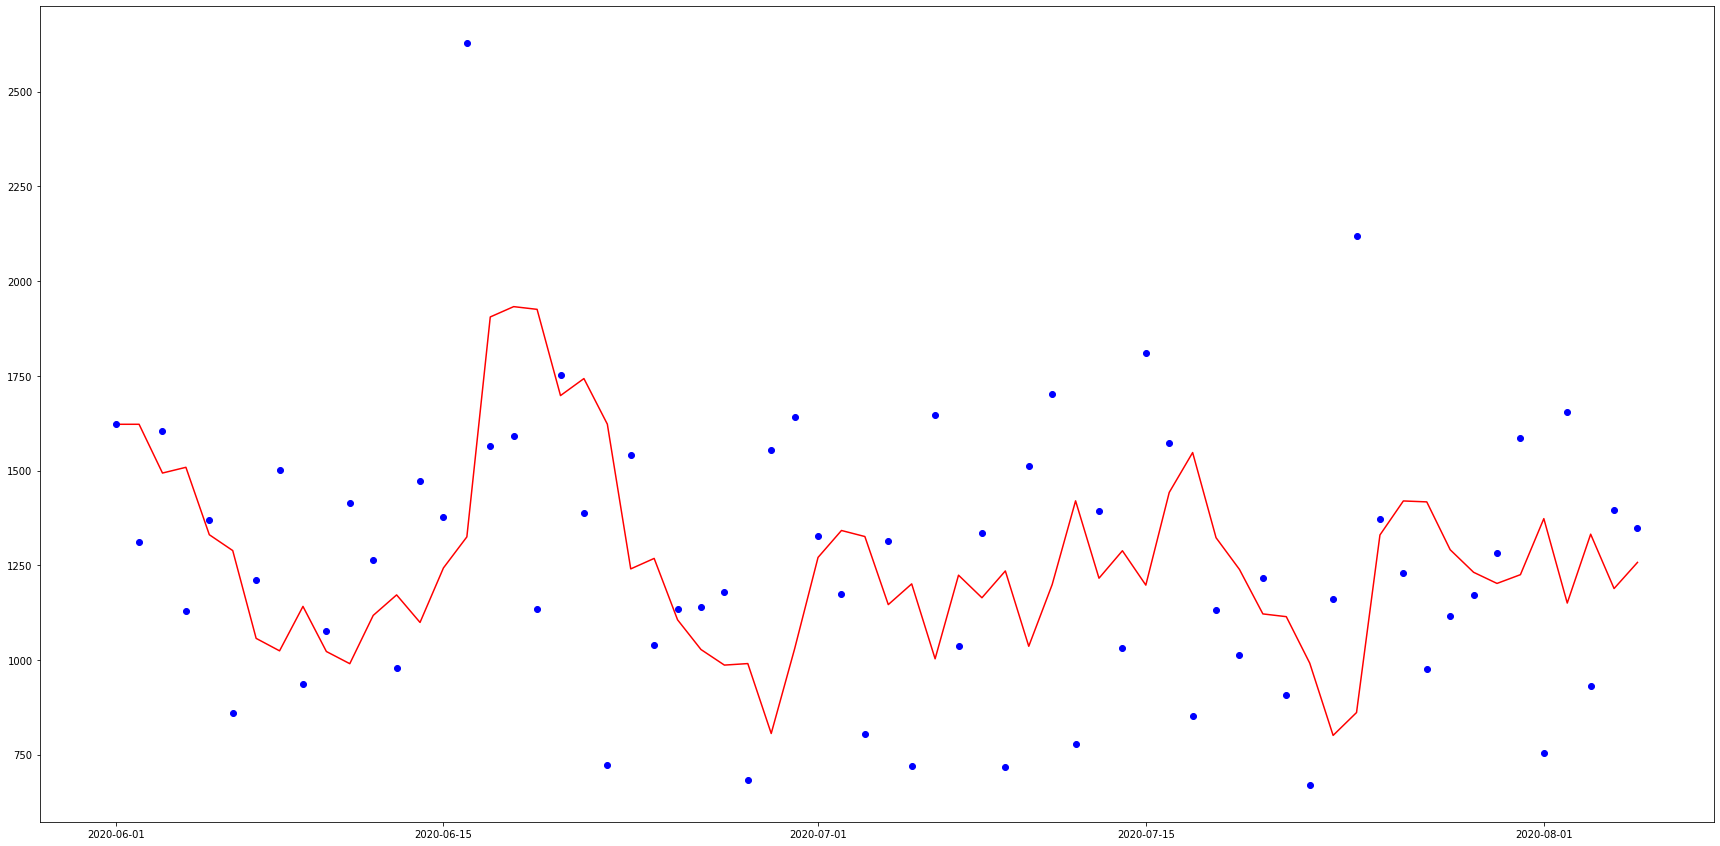

In [28]:
fig = plt.figure(figsize=(30, 15))#展示
ax = fig.add_subplot(111)
ax.plot(X.iloc[:,0],pred2,'r-',label ='二次指数平滑')
ax.plot(X.iloc[:,0],y,'bo')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

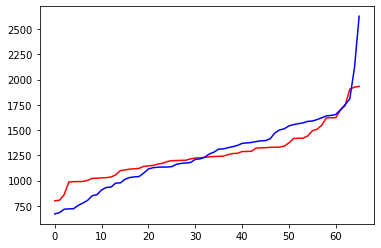

In [29]:
plt.plot(range(len(pred2)),sorted(pred2),'r-',label = 'polypredict')
plt.plot(range(len(y)),sorted(y),'b-',label = 'data')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

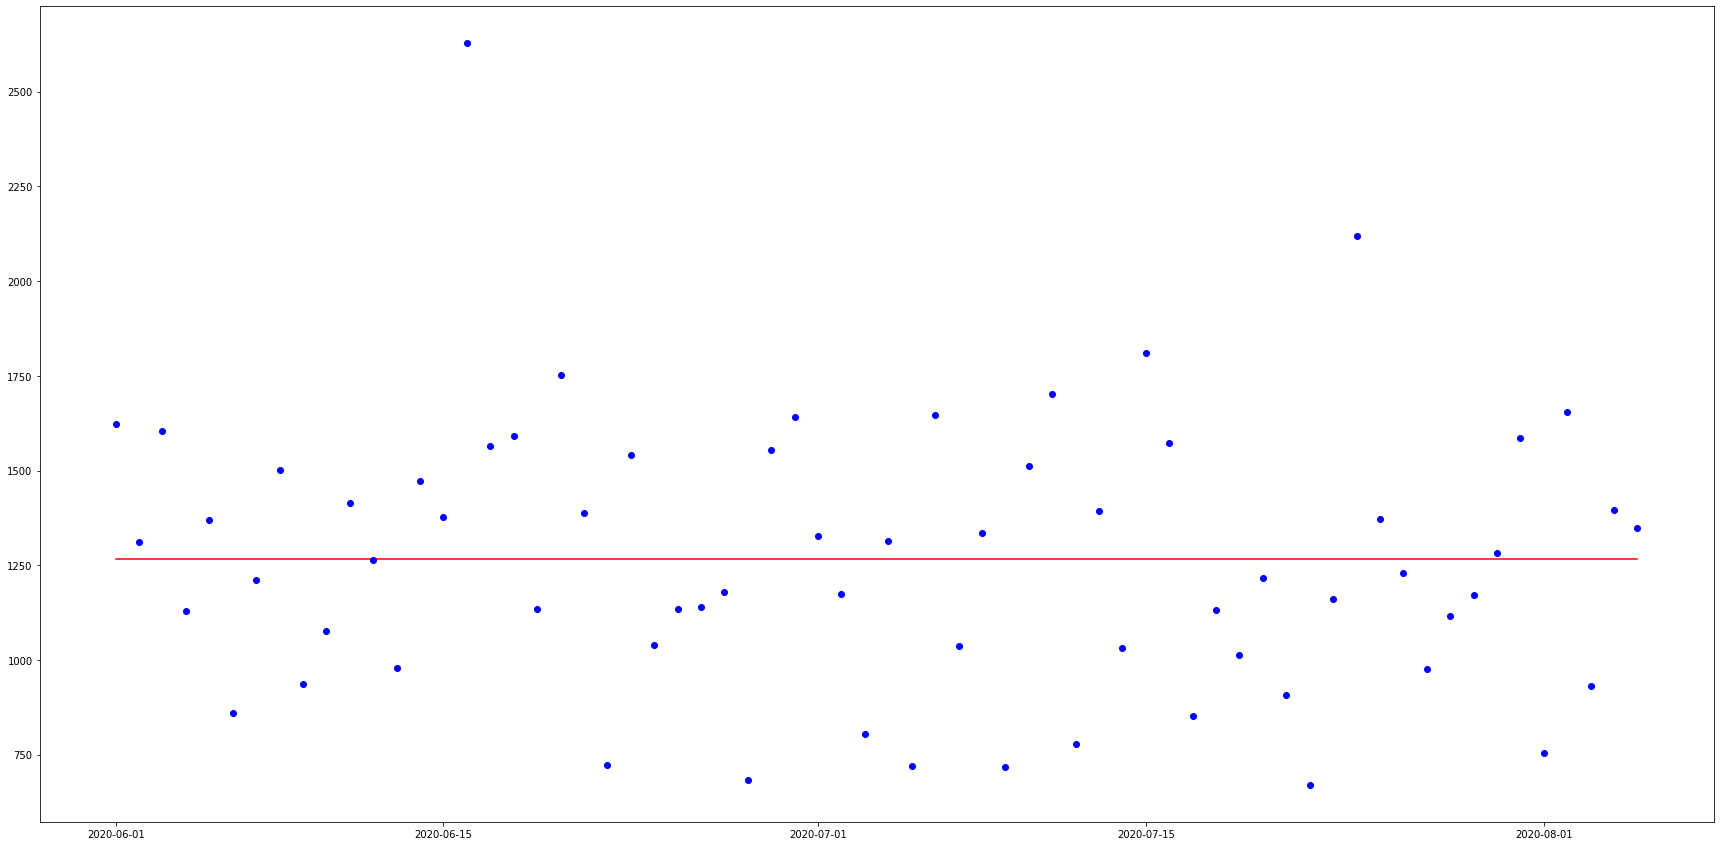

In [30]:
fig = plt.figure(figsize=(30, 15))#展示
ax = fig.add_subplot(111)
ax.plot(X.iloc[:,0],pred,'r-',label = '简单指数平滑')
ax.plot(X.iloc[:,0],y,'bo')
plt.show

In [31]:
# def ma(list):
#     n = len(list)
#     sum = 0
#     for i in list:
#         sum+=i
#     result = sum/n
#     return result
# def answer(list,n):
#     listma = []
#     for i in range(n-1,len(list)):
#         list2 = (list[i - (n-1):i+1])
#         listma.append(ma(list2))
#     print(listma)
# answer(y,5)
